# *Exercises*

1. What is the probability of observing a value five sigma greather than the mean or more?
    - We know that with knowing the mean and the std we can create a normal distriution.
    - To find certain probabilities for an event to be in a range we can use the normal probability density function (PDF)
        - $N(\mu,\sigma)=\frac{1}{\sqrt{2\pi \sigma^2}}\times e^{-{\frac{(x-\mu)^2}{2\sigma^2}}}$
        - Integrating this gives us the area under the curve for the range we are looking for
    - We also know that $\sigma$ from the $\mu$ has a *p* of 68%. Meaning the range $\mu+\sigma$ and $\mu-\sigma$ has a *p* of 68%.
        - $2\sigma$ has a *p* of 95%
        - $3\sigma$ has a *p* of 99.7%

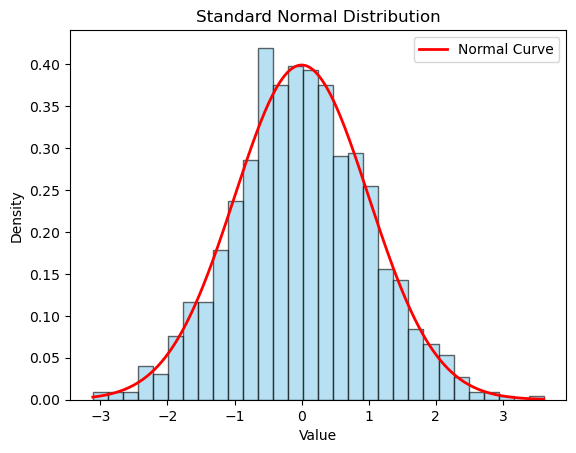

The P of being 5 sigma greater than the mean or more ist 0.0000002867


In [13]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Create standard normal distribution
dist = norm(loc=0, scale=1)
samples = dist.rvs(size=1000)

# Plot histogram
plt.hist(samples, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')

# Create x values for the curve
x = np.linspace(min(samples), max(samples), 1000)

# Get the PDF values from the distribution
pdf = dist.pdf(x)

# Plot the normal distribution curve
plt.plot(x, pdf, color='red', linewidth=2, label='Normal Curve')

# Add labels and legend
plt.title("Standard Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

print(f'The P of being 5 sigma greater than the mean or more ist {norm.sf(5):.10f}')

2. A fever is any temperature greater than 100.4 degrees F. Give the following measurements, what is the probability that the patient has a fever?
    - [100, 99.8, 101, 100.5, 99.7]

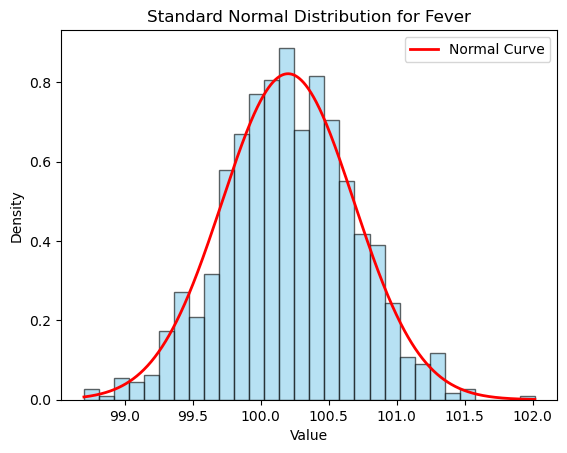

The P of the patient having fever is 0.3402820504876537%


In [20]:
import numpy as np
from scipy.stats import norm, beta
import matplotlib.pyplot as plt

values = [100.0, 99.8, 101.0, 100.5, 99.7]
mean = np.mean(values)
std = np.std(values)

dist = norm(loc=mean, scale=std)
samples = dist.rvs(1000)

# Plot histogram
plt.hist(samples, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')

# Create x values for the curve
x = np.linspace(min(samples), max(samples), 1000)

# Get the PDF values from the distribution
pdf = dist.pdf(x)

# Plot the normal distribution curve
plt.plot(x, pdf, color='red', linewidth=2, label='Normal Curve')

# Add labels and legend
plt.title("Standard Normal Distribution for Fever")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

print(f'The P of the patient having fever is {dist.sf(100.4)}%')

3. Suppose in Chapter 11 we tried to measure the depth of a well by timing coin drops and got the following values:
    - [2.5, 3, 3.5, 4, 2]
    - $\text{distance = }\frac{1}{2}\times G \times time^2$
        - where G is 9.8m/s/s
    - What is the *p* that the well is over 500 deep?

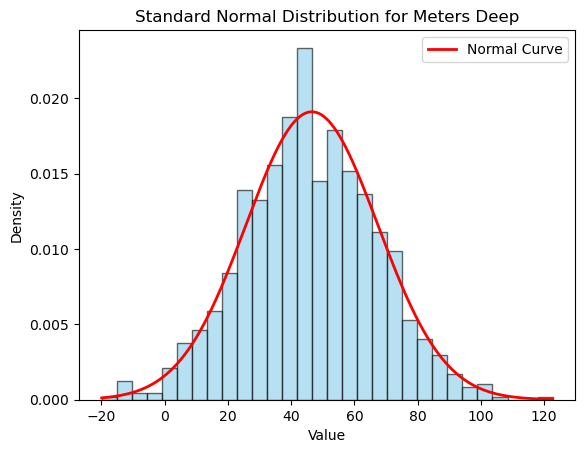

The P for the well being more than 500m is 8.844869351606747e-103%
Time needed to fall 500m is approximately 10.1015 seconds


In [40]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

values = np.array([2.5, 3, 3.5, 4, 2])

def distance(time):
    g = 9.8
    return (1/2)*g*time**2

meters_deep = distance(values)

mean_meters = np.mean(meters_deep)
std_meters = np.std(meters_deep)

dist = norm(loc=mean_meters, scale=std_meters)
samples = dist.rvs(1000)

# Plot histogram
plt.hist(samples, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')

# Create x values for the curve
x = np.linspace(min(samples), max(samples), 1000)

# Get the PDF values from the distribution
pdf = dist.pdf(x)

# Plot the normal distribution curve
plt.plot(x, pdf, color='red', linewidth=2, label='Normal Curve')

# Add labels and legend
plt.title("Standard Normal Distribution for Meters Deep")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

print(f'The P for the well being more than 500m is {(dist.sf(500))*100}%')

target_depth = 500
g = 9.8
tolerance = 0.01

while True:
    time = np.random.uniform(1, 20)
    depth = 0.5 * g * time**2
    if abs(depth - target_depth) < tolerance:
        print(f'Time needed to fall 500m is approximately {time:.4f} seconds')
        break